## 🔧 Part 1: Environment Setup

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: /Users/nazhimkalam/.pyenv/versions/evat_env_py310/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 29.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 22.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: /Users/nazhimkalam/.pyenv/versions/evat_env_py310/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Exploration & Preprocessing

### 1.1 Load & Inspect Dataset

In [104]:
import pandas as pd

df = pd.read_csv('station_data_dataverse.csv', low_memory=False)
print(df.columns)

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')


In [105]:
df.shape

(3395, 24)

In [106]:
df.head(3)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0


In [107]:
print(df['created'].head(10).tolist())
print(df['ended'].head(10).tolist())

['0014-11-18 15:40:26', '0014-11-19 17:40:26', '0014-11-21 12:05:46', '0014-12-03 19:16:12', '0014-12-11 20:56:11', '0014-12-12 14:38:44', '0014-12-12 15:08:40', '0014-12-17 20:30:25', '0014-12-18 17:53:19', '0014-12-18 18:06:49']
['0014-11-18 17:11:04', '0014-11-19 19:51:04', '0014-11-21 16:46:04', '0014-12-03 21:02:18', '0014-12-11 21:14:06', '0014-12-12 15:04:04', '0014-12-12 15:47:04', '0014-12-17 21:31:04', '0014-12-18 18:04:04', '0014-12-18 18:30:05']


In [108]:
# Just get the first 4 characters (year parts)
df['created_year_part'] = df['created'].str[:4]
print(df['created_year_part'].value_counts())


created_year_part
0015    3372
0014      23
Name: count, dtype: int64


In [109]:
print(df['created'].sample(10).tolist())

['0015-08-11 13:08:06', '0015-07-27 11:19:51', '0015-07-24 11:22:20', '0015-04-15 17:31:15', '0014-11-25 16:57:46', '0015-02-23 17:40:15', '0015-05-29 10:39:26', '0015-07-23 12:48:39', '0015-06-01 16:21:57', '0015-03-17 17:36:15']


In [110]:
# Correct the year prefix in both columns
df['created'] = df['created'].str.replace(r'^0014', '2014', regex=True)
df['created'] = df['created'].str.replace(r'^0015', '2015', regex=True)

df['ended'] = df['ended'].str.replace(r'^0014', '2014', regex=True)
df['ended'] = df['ended'].str.replace(r'^0015', '2015', regex=True)

# Convert to datetime
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['ended'] = pd.to_datetime(df['ended'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['created', 'ended'])
print("Final cleaned shape:", df.shape)


Final cleaned shape: (3395, 25)


In [111]:
df.shape

(3395, 25)

In [112]:
print("Min created:", df['created'].min())
print("Max ended:", df['ended'].max())

Min created: 2014-11-18 15:01:17
Max ended: 2015-10-04 15:54:06


In [113]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,created_year_part
0,1366563,7.78,0.00,2014-11-18 15:40:26,2014-11-18 17:11:04,15,17,1.510556,Tue,android,...,3,0,1,0,0,0,0,0,0,0014
1,3075723,9.74,0.00,2014-11-19 17:40:26,2014-11-19 19:51:04,17,19,2.177222,Wed,android,...,3,0,0,1,0,0,0,0,0,0014
2,4228788,6.76,0.58,2014-11-21 12:05:46,2014-11-21 16:46:04,12,16,4.671667,Fri,android,...,3,0,0,0,0,1,0,0,0,0014
3,3173284,6.17,0.00,2014-12-03 19:16:12,2014-12-03 21:02:18,19,21,1.768333,Wed,android,...,3,0,0,1,0,0,0,0,0,0014
4,3266500,0.93,0.00,2014-12-11 20:56:11,2014-12-11 21:14:06,20,21,0.298611,Thu,android,...,3,0,0,0,1,0,0,0,0,0014


### 1.2 Convert Columns to Datetime

- **coerce** will convert invalid dates to **NaT** (missing values) instead of throwing errors.

In [114]:
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['ended'] = pd.to_datetime(df['ended'], errors='coerce')

### 1.3 Data Cleaning

- Drop rows with null created, ended
- Ensure sessions are valid (e.g., ended > created)

In [115]:
df = df.dropna(subset=['created', 'ended'])
df = df[df['ended'] > df['created']]

In [116]:
print("Valid date range:")
print("Start:", df['created'].min())
print("End:", df['ended'].max())

Valid date range:
Start: 2014-11-18 15:01:17
End: 2015-10-04 15:54:06


In [117]:
df.count()

sessionId            3395
kwhTotal             3395
dollars              3395
created              3395
ended                3395
startTime            3395
endTime              3395
chargeTimeHrs        3395
weekday              3395
platform             3395
distance             2330
userId               3395
stationId            3395
locationId           3395
managerVehicle       3395
facilityType         3395
Mon                  3395
Tues                 3395
Wed                  3395
Thurs                3395
Fri                  3395
Sat                  3395
Sun                  3395
reportedZip          3395
created_year_part    3395
dtype: int64

### 1.4 Creating a Charging Duration Feature

In [118]:
df['charge_duration_hrs'] = (df['ended'] - df['created']).dt.total_seconds() / 3600

In [119]:
df.head(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,created_year_part,charge_duration_hrs
0,1366563,7.78,0.0,2014-11-18 15:40:26,2014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,1,0,0,0,0,0,0,0014,1.510556
1,3075723,9.74,0.0,2014-11-19 17:40:26,2014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,0,1,0,0,0,0,0,0014,2.177222


In [120]:
df['created_hour'] = df['created'].dt.hour
df['ended_hour'] = df['ended'].dt.hour

df.drop(columns=['startTime', 'endTime'], inplace=True)

In [121]:
df.head(2)

,sessionId,kwhTotal,dollars,created,ended,chargeTimeHrs,weekday,platform,distance,userId,...,Wed,Thurs,Fri,Sat,Sun,reportedZip,created_year_part,charge_duration_hrs,created_hour,ended_hour
0,1366563,7.78,0.0,2014-11-18 15:40:26,2014-11-18 17:11:04,1.510556,Tue,android,NaN,35897499,...,0,0,0,0,0,0,0014,1.510556,15,17
1,3075723,9.74,0.0,2014-11-19 17:40:26,2014-11-19 19:51:04,2.177222,Wed,android,NaN,35897499,...,1,0,0,0,0,0,0014,2.177222,17,19


### Remove Sessions with Unrealistic Durations

In [122]:
# Identify bad sessions: duration <= 0 or > 12 hours
bad_sessions = df[(df['charge_duration_hrs'] <= 0) | (df['charge_duration_hrs'] > 12)]

# Print them for inspection
print("Sessions removed due to invalid duration:")
print(bad_sessions[['sessionId', 'created', 'ended', 'charge_duration_hrs']])

# Now filter them out from the main DataFrame
df = df[(df['charge_duration_hrs'] > 0) & (df['charge_duration_hrs'] <= 12)]

print("Remaining rows after filtering:", df.shape)

Sessions removed due to invalid duration:
     sessionId             created               ended  charge_duration_hrs
173    2162299 2015-01-26 18:09:47 2015-01-29 01:24:04            55.238056
Remaining rows after filtering: (3394, 26)


### Histogram of Sessions Per Station

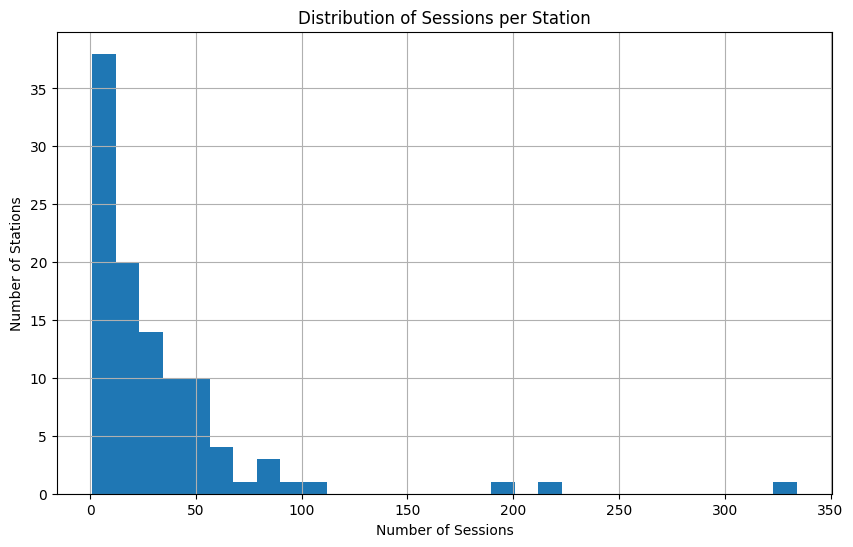

In [124]:
import matplotlib.pyplot as plt

station_counts = df['stationId'].value_counts()

plt.figure(figsize=(10, 6))
station_counts.hist(bins=30)
plt.title('Distribution of Sessions per Station')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

### Top 10 Busiest Stations

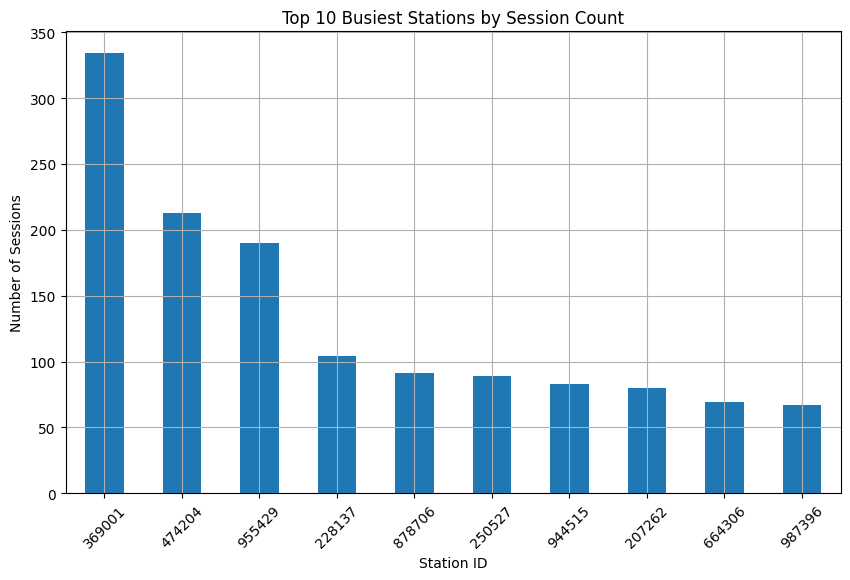

In [125]:
top10 = station_counts.head(10)

plt.figure(figsize=(10, 6))
top10.plot(kind='bar')
plt.title('Top 10 Busiest Stations by Session Count')
plt.xlabel('Station ID')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Time Range per Station (Min/Max created)

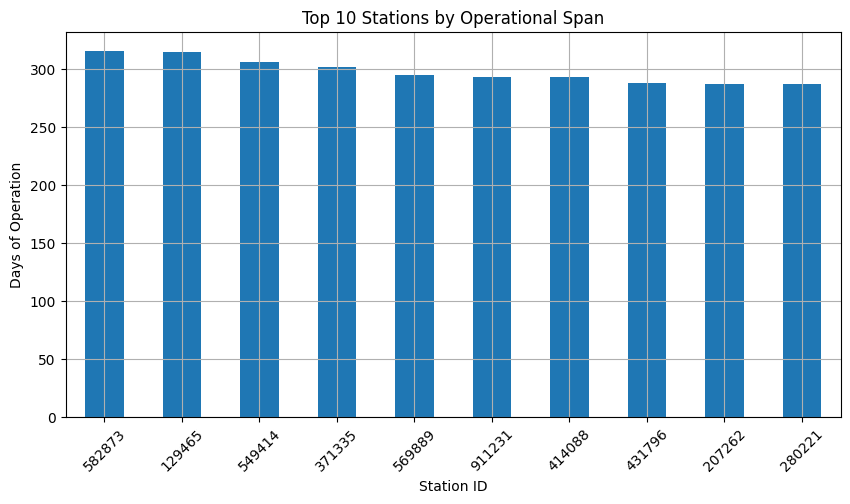

In [126]:
time_range = df.groupby('stationId')['created'].agg(['min', 'max'])
time_range['duration_days'] = (time_range['max'] - time_range['min']).dt.days
time_range = time_range.sort_values(by='duration_days', ascending=False).head(10)

time_range['duration_days'].plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Stations by Operational Span')
plt.ylabel('Days of Operation')
plt.xlabel('Station ID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Heatmap of Sessions by Hour of Day

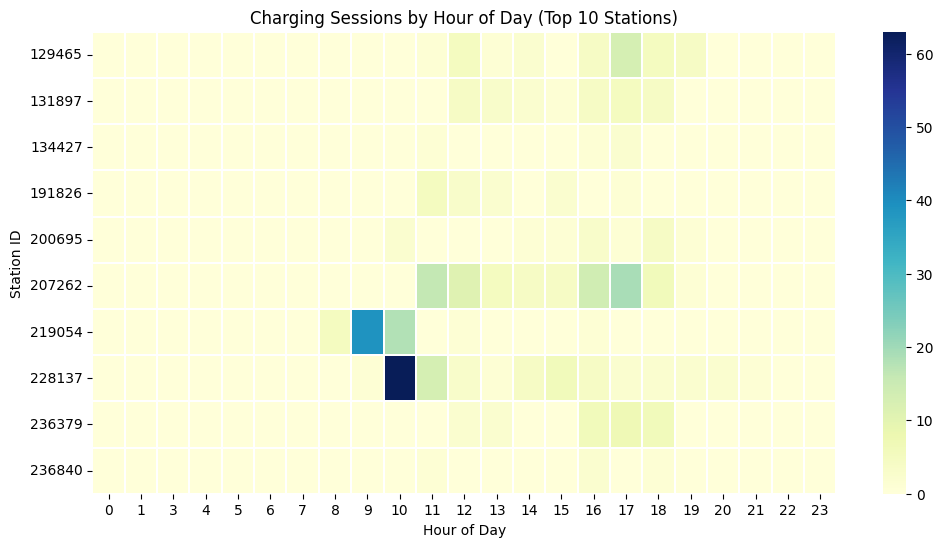

In [127]:
import seaborn as sns

df['created_hour'] = df['created'].dt.hour
hourly_counts = df.groupby(['stationId', 'created_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_counts.head(10), cmap='YlGnBu', linewidths=0.3)
plt.title('Charging Sessions by Hour of Day (Top 10 Stations)')
plt.xlabel('Hour of Day')
plt.ylabel('Station ID')
plt.show()

### Filtering stations with > 100 sessions

In [128]:
# Filter stations with > 100 sessions
station_counts = df['stationId'].value_counts()
active_stations = station_counts[station_counts > 100].index
df = df[df['stationId'].isin(active_stations)]

print("Filtered data shape:", df.shape)
print("Remaining stations:", df['stationId'].nunique())


Filtered data shape: (841, 26)
Remaining stations: 4


### Sorting the dataset based on stationID and created

In [129]:
df = df.sort_values(by=['stationId', 'created'])

### Confirm Station ID is a clean column

In [130]:
df['stationId'] = df['stationId'].astype(str)

### Ensure sessionId is unique

In [133]:
assert df['sessionId'].is_unique, "Duplicate session IDs found!"

### View cleaned dataset

In [134]:
df

,sessionId,kwhTotal,dollars,created,ended,chargeTimeHrs,weekday,platform,distance,userId,...,Wed,Thurs,Fri,Sat,Sun,reportedZip,created_year_part,charge_duration_hrs,created_hour,ended_hour
1870,6748253,6.49,1.33,2015-03-17 13:06:58,2015-03-17 18:30:10,5.386667,Tue,ios,19.103700,32015313,...,0,0,0,0,0,1,0015,5.386667,13,18
1879,7882118,0.00,0.00,2015-03-24 18:10:46,2015-03-24 18:12:05,0.021944,Tue,ios,NaN,92192265,...,0,0,0,0,0,1,0015,0.021944,18,18
724,8528273,0.01,0.00,2015-03-25 12:24:27,2015-03-25 12:27:05,0.043889,Wed,ios,15.329938,49241808,...,1,0,0,0,0,1,0015,0.043889,12,12
1881,6511872,6.83,0.00,2015-04-01 16:51:20,2015-04-01 19:10:06,2.312778,Wed,ios,14.956477,92192265,...,1,0,0,0,0,1,0015,2.312778,16,19
1959,7452830,6.08,0.00,2015-05-01 10:51:57,2015-05-01 13:01:06,2.152500,Fri,ios,19.354124,46009656,...,0,0,1,0,0,1,0015,2.152500,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,1133038,2.90,0.00,2015-10-01 11:54:48,2015-10-01 13:19:08,1.405556,Thu,ios,5.135871,81375624,...,0,1,0,0,0,1,0015,1.405556,11,13
3087,3323388,4.86,0.00,2015-10-02 09:54:49,2015-10-02 12:02:07,2.121667,Fri,ios,3.984417,66233970,...,0,0,1,0,0,1,0015,2.121667,9,12
1864,3831208,0.00,0.00,2015-10-02 12:02:04,2015-10-02 12:03:07,0.017500,Fri,ios,NaN,81375624,...,0,0,1,0,0,1,0015,0.017500,12,12
1865,5584844,4.72,0.00,2015-10-02 12:03:25,2015-10-02 14:08:07,2.078333,Fri,ios,5.135871,81375624,...,0,0,1,0,0,1,0015,2.078333,12,14


In [138]:
df.describe

<bound method NDFrame.describe of       sessionId  kwhTotal  dollars             created               ended  \
1870    6748253      6.49     1.33 2015-03-17 13:06:58 2015-03-17 18:30:10   
1879    7882118      0.00     0.00 2015-03-24 18:10:46 2015-03-24 18:12:05   
724     8528273      0.01     0.00 2015-03-25 12:24:27 2015-03-25 12:27:05   
1881    6511872      6.83     0.00 2015-04-01 16:51:20 2015-04-01 19:10:06   
1959    7452830      6.08     0.00 2015-05-01 10:51:57 2015-05-01 13:01:06   
...         ...       ...      ...                 ...                 ...   
1863    1133038      2.90     0.00 2015-10-01 11:54:48 2015-10-01 13:19:08   
3087    3323388      4.86     0.00 2015-10-02 09:54:49 2015-10-02 12:02:07   
1864    3831208      0.00     0.00 2015-10-02 12:02:04 2015-10-02 12:03:07   
1865    5584844      4.72     0.00 2015-10-02 12:03:25 2015-10-02 14:08:07   
1866    2214150      2.50     0.00 2015-10-02 15:47:03 2015-10-02 17:05:09   

      chargeTimeHrs weekday p

### Download the cleaned dataset

In [148]:
# Save the DataFrame to a CSV file
df.to_csv('pre-processed-dataset.csv', index=False)

## Time Series Construction 

### 📦 Load the Dataset

In [104]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("pre-processed-dataset.csv", parse_dates=['created', 'ended'])

# Get the shape of the dataset
print("Shape:", df.shape)
df.head()

Shape: (841, 26)


,sessionId,kwhTotal,dollars,created,ended,chargeTimeHrs,weekday,platform,distance,userId,...,Wed,Thurs,Fri,Sat,Sun,reportedZip,created_year_part,charge_duration_hrs,created_hour,ended_hour
0,6748253,6.49,1.33,2015-03-17 13:06:58,2015-03-17 18:30:10,5.386667,Tue,ios,19.103700,32015313,...,0,0,0,0,0,1,15,5.386667,13,18
1,7882118,0.00,0.00,2015-03-24 18:10:46,2015-03-24 18:12:05,0.021944,Tue,ios,NaN,92192265,...,0,0,0,0,0,1,15,0.021944,18,18
2,8528273,0.01,0.00,2015-03-25 12:24:27,2015-03-25 12:27:05,0.043889,Wed,ios,15.329938,49241808,...,1,0,0,0,0,1,15,0.043889,12,12
3,6511872,6.83,0.00,2015-04-01 16:51:20,2015-04-01 19:10:06,2.312778,Wed,ios,14.956477,92192265,...,1,0,0,0,0,1,15,2.312778,16,19
4,7452830,6.08,0.00,2015-05-01 10:51:57,2015-05-01 13:01:06,2.152500,Fri,ios,19.354124,46009656,...,0,0,1,0,0,1,15,2.152500,10,13


### 🔃 Sort and Sanity Check

In [101]:
# Ensure data is sorted
df = df.sort_values(by=['stationId', 'created'])

# Confirm time range
print("Earliest session:", df['created'].min())
print("Latest session:", df['ended'].max())

# Check number of stations
print("Unique stations:", df['stationId'].nunique())

Earliest session: 2015-03-07 13:29:10
Latest session: 2015-10-04 15:54:06
Unique stations: 4


### 🕒 Define Time Bins (60-minute intervals)

In [102]:
# Define 120-minute (2-hour) bin edges
start_time = df['created'].min().floor('120min')
end_time = df['ended'].max().ceil('120min')
all_bins = pd.date_range(start=start_time, end=end_time, freq='120min')

print(f"Number of 120-min intervals: {len(all_bins)}")

Number of 120-min intervals: 2535


### 🏗 Construct Time Series per Station

In [73]:
# Get List of stations
stations = df['stationId'].unique()

# Create empty list to store results
records = []

# Iterate through stations and 120-minute bins
for station in stations:
    df_station = df[df['stationId'] == station]
    
    for t in all_bins:
        t_end = t + pd.Timedelta(hours=2)  # 120-minute window

        # Count arrivals in [t, t+120)
        arrivals = df_station[(df_station['created'] >= t) & (df_station['created'] < t_end)].shape[0]

        # Count departures in [t, t+120)
        departures = df_station[(df_station['ended'] >= t) & (df_station['ended'] < t_end)].shape[0]

        # Count occupancy: sessions active at time t
        occupancy = df_station[(df_station['created'] <= t) & (df_station['ended'] > t)].shape[0]

        # Append result
        records.append([station, t, arrivals, departures, occupancy])


### 🧾 Create DataFrame and Save

In [74]:
# Convert to DataFrame
ts_df = pd.DataFrame(records, columns=['stationId', 'timestamp', 'arrivals', 'departures', 'occupancy'])

# Save to CSV
ts_df.to_csv("station_timeseries_120min.csv", index=False)

print("120-minute binned time series saved as 'station_timeseries_120min.csv'")


60-minute binned time series saved as 'station_timeseries_60min.csv'


In [76]:
# Reading and checking the timeseries data
import pandas as pd

ts_df = pd.read_csv('station_timeseries_60min.csv')
ts_df.head()

,stationId,timestamp,arrivals,departures,occupancy
0,228137,2015-03-07 13:00:00,0,0,0
1,228137,2015-03-07 14:00:00,0,0,0
2,228137,2015-03-07 15:00:00,0,0,0
3,228137,2015-03-07 16:00:00,0,0,0
4,228137,2015-03-07 17:00:00,0,0,0


## 🧠 Feature Engineering & Target Creation
Before modelling (LSTM or any other), you need to:

  1. Enhance your time series with useful features (calendar, lags, rolling stats)

  2. Define prediction targets (what the model should learn to forecast)

### 🧠 Step: Feature Engineering & Target Creation

#### 📦 Step 1: Load the Time Series Data

In [77]:
import pandas as pd

# Load the binned time series
ts_df = pd.read_csv("station_timeseries_60min.csv", parse_dates=['timestamp'])

# Sort for group-wise operations
ts_df = ts_df.sort_values(by=['stationId', 'timestamp'])

#### 🕒 Step 2: Add Time-based Features

In [78]:
# Temporal features
ts_df['hour'] = ts_df['timestamp'].dt.hour
ts_df['day_of_week'] = ts_df['timestamp'].dt.dayofweek
ts_df['is_weekend'] = ts_df['day_of_week'] >= 5

#### 🔁 Step 3: Add Lag Features

We'll add lagged occupancy values to help the model "remember" recent behavior.

In [79]:
# Lag features: occupancy 1, 2, 4 steps ago
for lag in [1, 2, 4]:
    ts_df[f'occupancy_lag_{lag}'] = ts_df.groupby('stationId')['occupancy'].shift(lag)


#### 📉 Step 4: Add Rolling Averages

Smooth trends in recent occupancy — helpful for LSTM and tree-based models.

In [80]:
# 2-hour and 4-hour rolling averages (8 and 16 steps of 15 mins)
ts_df['occupancy_ma_8'] = ts_df.groupby('stationId')['occupancy'].transform(lambda x: x.rolling(8).mean())
ts_df['occupancy_ma_16'] = ts_df.groupby('stationId')['occupancy'].transform(lambda x: x.rolling(16).mean())


#### 🎯 Step 5: Define Prediction Targets

Your model will predict:

- **target_occupancy**: occupancy one interval ahead

- **target_arrivals**: arrival count one interval ahead

In [81]:
# Prediction targets (t+1 step)
ts_df['target_occupancy'] = ts_df.groupby('stationId')['occupancy'].shift(-1)
ts_df['target_arrivals'] = ts_df.groupby('stationId')['arrivals'].shift(-1)


#### 🧹 Step 6: Drop Rows with Missing Values (from shifting/rolling)

In [82]:
ts_df = ts_df.dropna().reset_index(drop=True)
print("Final shape after feature engineering:", ts_df.shape)
ts_df.head()


Final shape after feature engineering: (20208, 15)


,stationId,timestamp,arrivals,departures,occupancy,hour,day_of_week,is_weekend,occupancy_lag_1,occupancy_lag_2,occupancy_lag_4,occupancy_ma_8,occupancy_ma_16,target_occupancy,target_arrivals
0,228137,2015-03-08 04:00:00,0,0,0,4,6,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,228137,2015-03-08 05:00:00,0,0,0,5,6,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,228137,2015-03-08 06:00:00,0,0,0,6,6,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,228137,2015-03-08 07:00:00,0,0,0,7,6,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,228137,2015-03-08 08:00:00,0,0,0,8,6,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ✅ Train/Validation/Test Split (per station, time-based)

Before any modeling (baseline or LSTM), you need to:

- Divide the dataset into:

    - Training set – for learning patterns

    - Validation set – for tuning hyperparameters

    - Test set – for evaluating final model

- Respect time order to avoid data leakage (especially in time series)

### 📦 Assumptions

- We'll split each station’s data separately
- Recommended proportions:

    - Train: 70%
    - Validation: 15%
    - Test: 15%



#### 🧱 Code: Time-based Data Splitting (Jupyter-Ready)

In [83]:
# Load data if not already loaded
import pandas as pd

ts_df = pd.read_csv("station_timeseries_60min.csv", parse_dates=['timestamp'])

# (Optional) load with features already added if you saved from the last step
# ts_df = pd.read_csv("features_dataset.csv", parse_dates=['timestamp'])

# Sort to maintain time order
ts_df = ts_df.sort_values(by=['stationId', 'timestamp']).reset_index(drop=True)

#### 🔄 Function: Split per Station

In [84]:
def split_time_series(df, station_col='stationId', time_col='timestamp', train_ratio=0.7, val_ratio=0.15):
    train_frames, val_frames, test_frames = [], [], []
    
    for station, group in df.groupby(station_col):
        group = group.sort_values(time_col)
        n = len(group)
        
        train_end = int(n * train_ratio)
        val_end = train_end + int(n * val_ratio)
        
        train_frames.append(group.iloc[:train_end])
        val_frames.append(group.iloc[train_end:val_end])
        test_frames.append(group.iloc[val_end:])
        
    train = pd.concat(train_frames).reset_index(drop=True)
    val = pd.concat(val_frames).reset_index(drop=True)
    test = pd.concat(test_frames).reset_index(drop=True)
    
    return train, val, test

#### 🚀 Apply the Function

In [85]:
train_df, val_df, test_df = split_time_series(ts_df)

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (14188, 5)
Validation shape: (3040, 5)
Test shape: (3044, 5)


#### ✅ Optional: Save Splits

In [86]:
train_df.to_csv("train_set_60min.csv", index=False)
val_df.to_csv("val_set_60min.csv", index=False)
test_df.to_csv("test_set_60min.csv", index=False)

## 🎯 Goal of This Step:

Train and evaluate **simple, interpretable models** that forecast:

- `target_occupancy` (number of sessions currently charging)  
- `target_arrivals` (number of new sessions starting)

---

## 🧠 Baseline Models We'll Implement:

| **Model Type**     | **Description**                                                |
|--------------------|----------------------------------------------------------------|
| **Naive**          | $\hat{y}(t+1) = y(t)$ — assumes next value is same as now      |
| **Seasonal Naive** | $\hat{y}(t+1) = y(t-96)$ — same time yesterday (96 × 15min = 24h) |
| **Moving Average** | Mean of last 4 values (1 hour)                                 |


#### 📥 Step 1: Load Train/Test Sets

In [87]:
import pandas as pd

# Load previously saved splits
train_df = pd.read_csv("train_set_60min.csv", parse_dates=['timestamp'])
val_df = pd.read_csv("val_set_60min.csv", parse_dates=['timestamp'])
test_df = pd.read_csv("test_set_60min.csv", parse_dates=['timestamp'])

#### ⚙️ Step 2: Evaluation Function (MAE, RMSE)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(mae, 4), round(rmse, 4)

#### 📈 Step 3: Naive Forecast

In [89]:
# Create target column if it doesn't exist
if 'target_occupancy' not in test_df.columns:
    test_df['target_occupancy'] = test_df.groupby('stationId')['occupancy'].shift(-1)

# Predict t+1 occupancy using current occupancy
test_df['naive_pred'] = test_df.groupby('stationId')['occupancy'].shift(0)

# Drop missing target rows (if any)
naive_eval = test_df.dropna(subset=['target_occupancy', 'naive_pred'])

# Evaluate
mae, rmse = evaluate(naive_eval['target_occupancy'], naive_eval['naive_pred'])
print(f"Naive Occupancy Forecast — MAE: {mae}, RMSE: {rmse}")

Naive Occupancy Forecast — MAE: 0.0862, RMSE: 0.2936


#### ⏳ Step 4: Seasonal Naive (Same time yesterday)

In [90]:
# Seasonal lag = 96 (24h ahead = 96 x 15min)
test_df['seasonal_pred'] = test_df.groupby('stationId')['occupancy'].shift(96)

seasonal_eval = test_df.dropna(subset=['target_occupancy', 'seasonal_pred'])

mae, rmse = evaluate(seasonal_eval['target_occupancy'], seasonal_eval['seasonal_pred'])
print(f"Seasonal Naive Forecast — MAE: {mae}, RMSE: {rmse}")

Seasonal Naive Forecast — MAE: 0.1755, RMSE: 0.4189


#### 📊 Step 5: Moving Average (last 4 intervals = 1 hour)

In [91]:
test_df['ma_pred'] = test_df.groupby('stationId')['occupancy'].transform(lambda x: x.shift(1).rolling(4).mean())

ma_eval = test_df.dropna(subset=['target_occupancy', 'ma_pred'])

mae, rmse = evaluate(ma_eval['target_occupancy'], ma_eval['ma_pred'])
print(f"Moving Average (1h) — MAE: {mae}, RMSE: {rmse}")

Moving Average (1h) — MAE: 0.1735, RMSE: 0.3581


#### 📋 Optional: Compare All Baselines in One Table

In [92]:
results = []

for model_name, pred_col in [('Naive', 'naive_pred'), ('Seasonal', 'seasonal_pred'), ('Moving Avg', 'ma_pred')]:
    df_eval = test_df.dropna(subset=['target_occupancy', pred_col])
    mae, rmse = evaluate(df_eval['target_occupancy'], df_eval[pred_col])
    results.append({'Model': model_name, 'MAE': mae, 'RMSE': rmse})

baseline_results = pd.DataFrame(results)
baseline_results

,Model,MAE,RMSE
0,Naive,0.0862,0.2936
1,Seasonal,0.1755,0.4189
2,Moving Avg,0.1735,0.3581


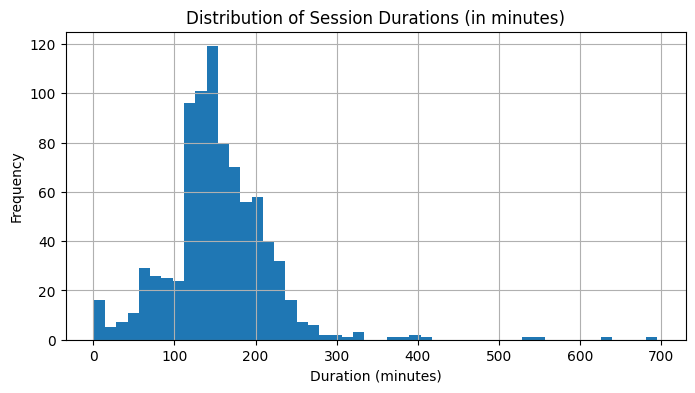

count    841.000000
mean     153.962802
std       64.807585
min        0.766667
25%      122.800000
50%      148.200000
75%      187.016667
max      695.216667
Name: duration_min, dtype: float64


In [66]:
df = pd.read_csv("pre-processed-dataset.csv", parse_dates=['created', 'ended'])
df['duration_min'] = (df['ended'] - df['created']).dt.total_seconds() / 60

df['duration_min'].hist(bins=50, figsize=(8, 4))
plt.title("Distribution of Session Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(df['duration_min'].describe())


/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/3642207872.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.fit_transform(train_df[features])
/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/3642207872.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[features] = scaler.transform(val_df[features])
/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/3642207872.py:61: SettingWithCopyWarning: 
A value is trying to be set on

Class Weights: {0: np.float64(0.5229086609518179), 1: np.float64(11.412903225806451)}
Epoch 1/50


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6695 - loss: 0.5016 - val_accuracy: 0.6487 - val_loss: 0.5389
Epoch 2/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6788 - loss: 0.4246 - val_accuracy: 0.6563 - val_loss: 0.5165
Epoch 3/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7165 - loss: 0.3896 - val_accuracy: 0.7106 - val_loss: 0.4726
Epoch 4/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7300 - loss: 0.3913 - val_accuracy: 0.6526 - val_loss: 0.5347
Epoch 5/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7194 - loss: 0.4077 - val_accuracy: 0.7437 - val_loss: 0.4256
Epoch 6/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7349 - loss: 0.3911 - val_accuracy: 0.7964 - val_loss: 0.3993
Epoch 7/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7371 - loss: 0.3859 - val_accuracy: 0.8020 - val_loss: 0.4167
Epoch 8/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7355 - loss: 0.3896 - val_accuracy: 0.7076 - val_

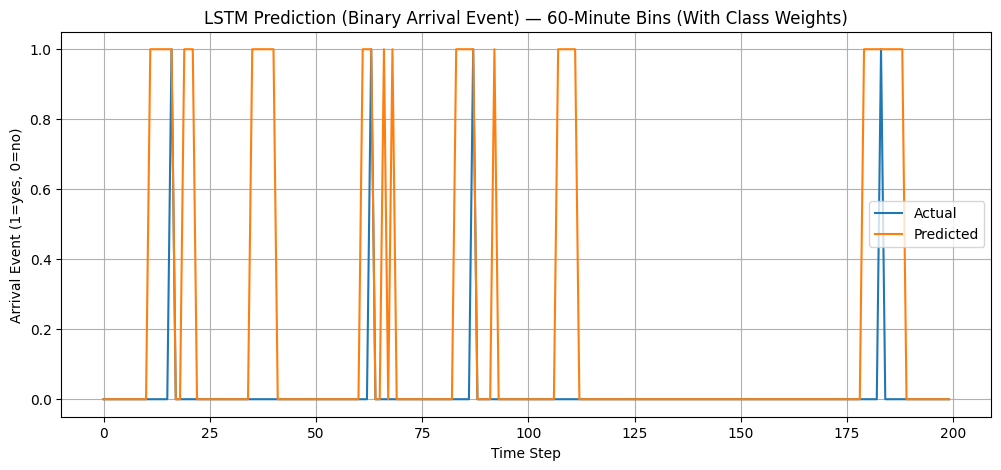

In [94]:
# ========================
# STEP 1: Load 60-Minute Time Series Dataset
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the binned data
df = pd.read_csv("station_timeseries_60min.csv", parse_dates=['timestamp'])

# ========================
# STEP 2: Feature Engineering
# ========================
df.sort_values(by=['stationId', 'timestamp'], inplace=True)

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

df['arrivals_lag_1'] = df.groupby('stationId')['arrivals'].shift(1)
df['arrivals_lag_2'] = df.groupby('stationId')['arrivals'].shift(2)
df['arrivals_lag_4'] = df.groupby('stationId')['arrivals'].shift(4)
df['arrivals_ma_4'] = df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(4).mean())
df['arrivals_ma_8'] = df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(8).mean())

# Binary target for arrival in next bin
df['target_arrivals'] = df.groupby('stationId')['arrivals'].shift(-1)
df['target_binary'] = (df['target_arrivals'] > 0).astype(int)

# Drop missing values
df.dropna(inplace=True)

# ========================
# STEP 3: Train-Test Split
# ========================
df = df.sort_values(by=['stationId', 'timestamp']).reset_index(drop=True)

train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

# ========================
# STEP 4: Feature Scaling
# ========================
features = ['hour', 'day_of_week', 'is_weekend',
            'arrivals_lag_1', 'arrivals_lag_2', 'arrivals_lag_4',
            'arrivals_ma_4', 'arrivals_ma_8']

scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

# Target arrays
y_train = train_df['target_binary'].values
y_val = val_df['target_binary'].values
y_test = test_df['target_binary'].values

# ========================
# STEP 5: Sequence Construction
# ========================
def create_sequences(df, feature_cols, target_array, seq_len=16):
    X, y = [], []
    for i in range(seq_len, len(df)):
        X.append(df[feature_cols].iloc[i - seq_len:i].values)
        y.append(target_array[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_df, features, y_train)
X_val, y_val = create_sequences(val_df, features, y_val)
X_test, y_test = create_sequences(test_df, features, y_test)

# ========================
# STEP 6: Compute Class Weights
# ========================
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights_dict)

# ========================
# STEP 7: Build and Train LSTM
# ========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# ========================
# STEP 8: Evaluate and Visualize
# ========================
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"\n📊 LSTM Binary Classification on 60-Minute Bins (with class weighting):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Plot first 200 steps
plt.figure(figsize=(12, 5))
plt.plot(y_test[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title('LSTM Prediction (Binary Arrival Event) — 60-Minute Bins (With Class Weights)')
plt.xlabel('Time Step')
plt.ylabel('Arrival Event (1=yes, 0=no)')
plt.legend()
plt.grid(True)
plt.show()


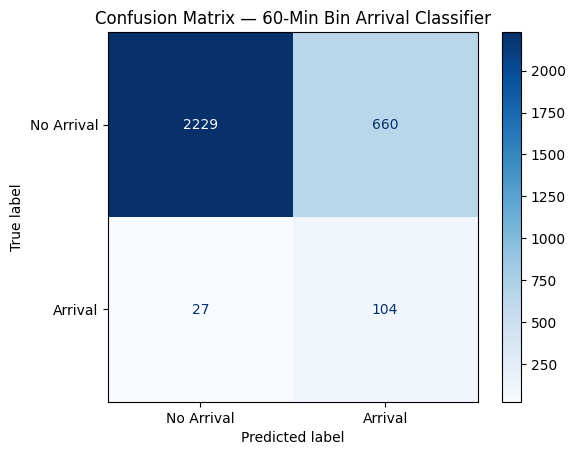

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Arrival", "Arrival"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix — 60-Min Bin Arrival Classifier")
plt.grid(False)
plt.show()


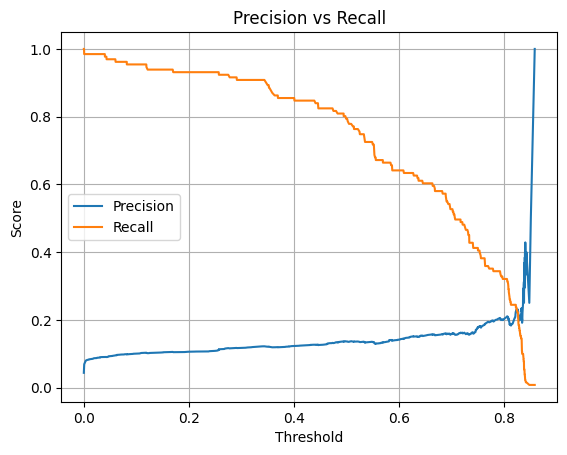

In [96]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot tradeoff
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall")
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# ========================
# STEP 1: Load Dataset
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the binned data (60-min bins)
df = pd.read_csv("station_timeseries_60min.csv", parse_dates=['timestamp'])

# ========================
# STEP 2: Feature Engineering
# ========================
df.sort_values(by=['stationId', 'timestamp'], inplace=True)

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

df['arrivals_lag_1'] = df.groupby('stationId')['arrivals'].shift(1)
df['arrivals_lag_2'] = df.groupby('stationId')['arrivals'].shift(2)
df['arrivals_lag_4'] = df.groupby('stationId')['arrivals'].shift(4)
df['arrivals_ma_4'] = df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(4).mean())
df['arrivals_ma_8'] = df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(8).mean())

# Regression target: arrival count in next hour
df['target_arrivals'] = df.groupby('stationId')['arrivals'].shift(-1)

df.dropna(inplace=True)

# ========================
# STEP 3: Train-Test Split
# ========================
df = df.sort_values(by=['stationId', 'timestamp']).reset_index(drop=True)

train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

# ========================
# STEP 4: Feature Scaling
# ========================
features = ['hour', 'day_of_week', 'is_weekend',
            'arrivals_lag_1', 'arrivals_lag_2', 'arrivals_lag_4',
            'arrivals_ma_4', 'arrivals_ma_8']

scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

# Targets
y_train = train_df['target_arrivals'].values
y_val = val_df['target_arrivals'].values
y_test = test_df['target_arrivals'].values

# ========================
# STEP 5: Sequence Construction
# ========================
def create_sequences(df, feature_cols, target_array, seq_len=16):
    X, y = [], []
    for i in range(seq_len, len(df)):
        X.append(df[feature_cols].iloc[i - seq_len:i].values)
        y.append(target_array[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_df, features, y_train)
X_val, y_val = create_sequences(val_df, features, y_val)
X_test, y_test = create_sequences(test_df, features, y_test)

# ========================
# STEP 6: Build and Train LSTM Regression Model
# ========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Output is a float (arrival count)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# ========================
# STEP 7: Evaluate and Visualize
# ========================
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 LSTM Regression on 60-Minute Bins:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

# ========================
# STEP 8: Plot Predictions
# ========================
plt.figure(figsize=(12, 5))
plt.plot(y_test[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title('LSTM Regression: Arrival Count Prediction — 60-Minute Bins')
plt.xlabel('Time Step')
plt.ylabel('Number of Arrivals')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/902816177.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.fit_transform(train_df[features])
/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/902816177.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[features] = scaler.transform(val_df[features])
/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/902816177.py:60: SettingWithCopyWarning: 
A value is trying to be set on a 

Epoch 1/50


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [108]:
# Step 1: Load your session-level dataset
df = pd.read_csv("pre-processed-dataset.csv", parse_dates=['created', 'ended'])



🧪 Processing bin size: 15min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   
✅ Bin size: 15min → MAE: 0.0214, RMSE: 0.1034

🧪 Processing bin size: 30min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
✅ Bin size: 30min → MAE: 0.0379, RMSE: 0.1446

🧪 Processing bin size: 60min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
✅ Bin size: 60min → MAE: 0.0830, RMSE: 0.1972

🧪 Processing bin size: 90min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
✅ Bin size: 90min → MAE: 0.0957, RMSE: 0.2281

🧪 Processing bin size: 120min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
✅ Bin size: 120min → MAE: 0.1350, RMSE: 0.2583

🧪 Processing bin size: 150min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
✅ Bin size: 150min → MAE: 0.1525, RMSE: 0.2749

🧪 Processing bin size: 180min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ Bin size: 180min → MAE: 0.1766, RMSE: 0.2977

🧪 Processing bin size: 210min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
✅ Bin size: 210min → MAE: 0.1952, RMSE: 0.3230

🧪 Processing bin size: 240min


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ Bin size: 240min → MAE: 0.1936, RMSE: 0.3372


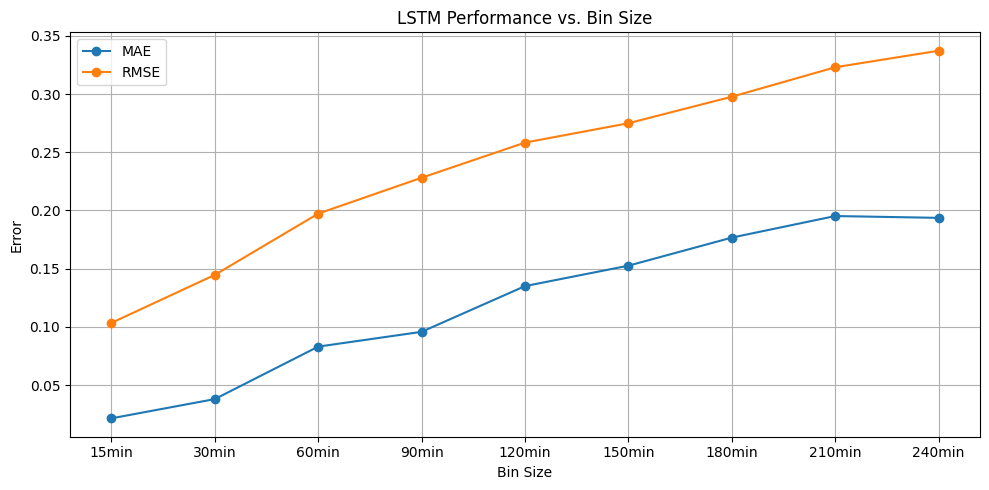

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ========================
# Helper Functions
# ========================

def construct_time_series(df, bin_size):
    start_time = df['created'].min().floor(bin_size)
    end_time = df['ended'].max().ceil(bin_size)
    all_bins = pd.date_range(start=start_time, end=end_time, freq=bin_size)
    bin_minutes = int(pd.Timedelta(bin_size).total_seconds() // 60)

    records = []
    for station in df['stationId'].unique():
        df_station = df[df['stationId'] == station]
        for t in all_bins:
            t_end = t + pd.Timedelta(minutes=bin_minutes)
            arrivals = df_station[(df_station['created'] >= t) & (df_station['created'] < t_end)].shape[0]
            departures = df_station[(df_station['ended'] >= t) & (df_station['ended'] < t_end)].shape[0]
            occupancy = df_station[(df_station['created'] <= t) & (df_station['ended'] > t)].shape[0]
            records.append([station, t, arrivals, departures, occupancy])
    ts_df = pd.DataFrame(records, columns=['stationId', 'timestamp', 'arrivals', 'departures', 'occupancy'])
    return ts_df

def preprocess_features(ts_df):
    ts_df['hour'] = ts_df['timestamp'].dt.hour
    ts_df['day_of_week'] = ts_df['timestamp'].dt.dayofweek
    ts_df['is_weekend'] = (ts_df['day_of_week'] >= 5).astype(int)
    ts_df['arrivals_lag_1'] = ts_df.groupby('stationId')['arrivals'].shift(1)
    ts_df['arrivals_lag_2'] = ts_df.groupby('stationId')['arrivals'].shift(2)
    ts_df['arrivals_lag_4'] = ts_df.groupby('stationId')['arrivals'].shift(4)
    ts_df['arrivals_ma_4'] = ts_df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(4).mean())
    ts_df['arrivals_ma_8'] = ts_df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(8).mean())
    ts_df['target_arrivals'] = ts_df.groupby('stationId')['arrivals'].shift(-1)
    ts_df.dropna(inplace=True)
    return ts_df

def create_sequences(df, feature_cols, target_col, seq_len=16):
    X, y = [], []
    for i in range(seq_len, len(df)):
        X.append(df[feature_cols].iloc[i - seq_len:i].values)
        y.append(df[target_col].iloc[i])
    return np.array(X), np.array(y)

def train_and_evaluate_lstm(ts_df, features):
    df = ts_df.copy()
    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])

    train_size = int(len(df) * 0.7)
    val_size = int(len(df) * 0.15)
    train_df, val_df, test_df = df[:train_size], df[train_size:train_size + val_size], df[train_size + val_size:]

    X_train, y_train = create_sequences(train_df, features, 'target_arrivals')
    X_val, y_val = create_sequences(val_df, features, 'target_arrivals')
    X_test, y_test = create_sequences(test_df, features, 'target_arrivals')

    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=32,
              validation_data=(X_val, y_val),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
              verbose=0)

    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

# ========================
# Experiment with Bin Sizes
# ========================

bin_sizes = ['15min', '30min', '60min', '90min', '120min', '150min', '180min', '210min', '240min']
results = []

for bin_size in bin_sizes:
    print(f"\n🧪 Processing bin size: {bin_size}")
    ts_df = construct_time_series(df, bin_size)
    ts_df['timestamp'] = pd.to_datetime(ts_df['timestamp'])
    ts_df = preprocess_features(ts_df)

    features = ['hour', 'day_of_week', 'is_weekend',
                'arrivals_lag_1', 'arrivals_lag_2', 'arrivals_lag_4',
                'arrivals_ma_4', 'arrivals_ma_8']

    mae, rmse = train_and_evaluate_lstm(ts_df, features)
    results.append({'bin_size': bin_size, 'MAE': mae, 'RMSE': rmse})
    print(f"✅ Bin size: {bin_size} → MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    ts_df.to_csv(f"station_timeseries_{bin_size}.csv", index=False)

# ========================
# Plot Performance by Bin Size
# ========================
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
plt.plot(results_df['bin_size'], results_df['MAE'], label='MAE', marker='o')
plt.plot(results_df['bin_size'], results_df['RMSE'], label='RMSE', marker='o')
plt.title("LSTM Performance vs. Bin Size")
plt.xlabel("Bin Size")
plt.ylabel("Error")
plt.legend()
plt.grid(True
plt.tight_layout()
plt.show()


/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/1281323814.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.fit_transform(train_df[features])
/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/1281323814.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[features] = scaler.transform(val_df[features])
/var/folders/2z/x7vmsxmd1cg10w353m_fl_240000gn/T/ipykernel_19403/1281323814.py:58: SettingWithCopyWarning: 
A value is trying to be set on

Epoch 1/50


/Users/nazhimkalam/.pyenv/versions/evat_env_py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0104 - val_loss: 0.0073
Epoch 2/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0107 - val_loss: 0.0074
Epoch 3/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0100 - val_loss: 0.0074
Epoch 4/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0108 - val_loss: 0.0074
Epoch 5/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0102 - val_loss: 0.0074
Epoch 6/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0103 - val_loss: 0.0074
Epoch 7/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0111 - val_loss: 0.0075
Epoch 8/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0112 - val_loss: 0.0073
Epoch 9/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0103 - val_loss: 0.0075
Epoch 10/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0102 - val_loss: 0.0078
Epoch 11/50
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0102 - val_loss: 0.0077
Epoch 12/50
1772/1772 ━━━━━━━━━━━━━━━━━━━

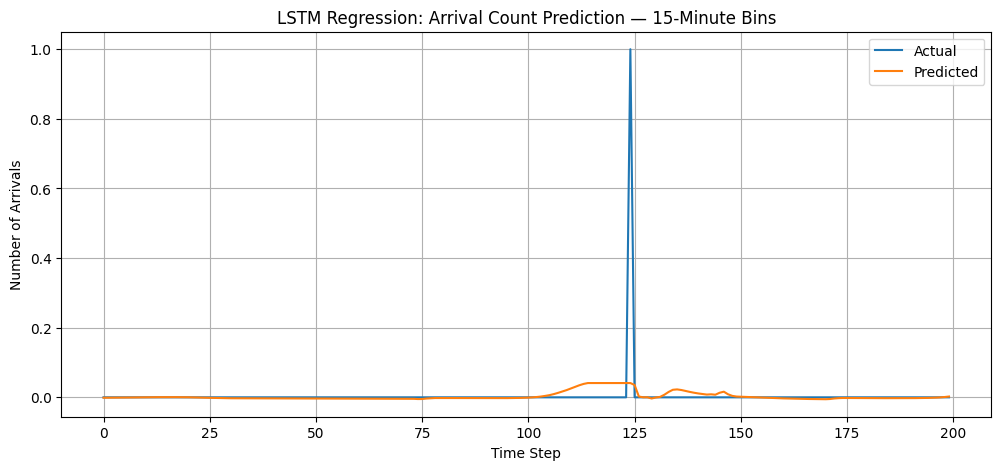

In [111]:
# ========================
# STEP 1: Imports
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ========================
# STEP 2: Load Time Series Dataset (15-min bin)
# ========================
df = pd.read_csv("station_timeseries_15min.csv", parse_dates=['timestamp'])
df.sort_values(by=['stationId', 'timestamp'], inplace=True)

# ========================
# STEP 3: Feature Engineering
# ========================
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

df['arrivals_lag_1'] = df.groupby('stationId')['arrivals'].shift(1)
df['arrivals_lag_2'] = df.groupby('stationId')['arrivals'].shift(2)
df['arrivals_lag_4'] = df.groupby('stationId')['arrivals'].shift(4)
df['arrivals_ma_4'] = df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(4).mean())
df['arrivals_ma_8'] = df.groupby('stationId')['arrivals'].transform(lambda x: x.rolling(8).mean())

df['target_arrivals'] = df.groupby('stationId')['arrivals'].shift(-1)

df.dropna(inplace=True)

# ========================
# STEP 4: Train-Test Split
# ========================
df = df.sort_values(by=['stationId', 'timestamp']).reset_index(drop=True)

train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

# ========================
# STEP 5: Feature Scaling
# ========================
features = ['hour', 'day_of_week', 'is_weekend',
            'arrivals_lag_1', 'arrivals_lag_2', 'arrivals_lag_4',
            'arrivals_ma_4', 'arrivals_ma_8']

scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

y_train = train_df['target_arrivals'].values
y_val = val_df['target_arrivals'].values
y_test = test_df['target_arrivals'].values

# ========================
# STEP 6: Sequence Construction
# ========================
def create_sequences(df, feature_cols, target_array, seq_len=16):
    X, y = [], []
    for i in range(seq_len, len(df)):
        X.append(df[feature_cols].iloc[i - seq_len:i].values)
        y.append(target_array[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_df, features, y_train)
X_val, y_val = create_sequences(val_df, features, y_val)
X_test, y_test = create_sequences(test_df, features, y_test)

# ========================
# STEP 7: Build and Train LSTM
# ========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# ========================
# STEP 8: Evaluate and Visualize
# ========================
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 LSTM Regression on 15-Minute Bins:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(12, 5))
plt.plot(y_test[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title('LSTM Regression: Arrival Count Prediction — 15-Minute Bins')
plt.xlabel('Time Step')
plt.ylabel('Number of Arrivals')
plt.legend()
plt.grid(True)
plt.show()
